# Mission 1.

You have been given a set of data and requested to explore and present some results.
You should use data provided in the file: ExtendaDataSet_01.zip


## Tasks 1. 
Produce graphs of quantity of sales in all stores over:
Weekdays (mon, tue etc) Hours

In [0]:
import pandas as pd 

### Read data 

In [0]:
!wget https://www.dropbox.com/s/kw5pfilxtk6lg3h/ExtendaDataSet_01.zip?dl=0


--2020-04-23 10:14:34--  https://www.dropbox.com/s/kw5pfilxtk6lg3h/ExtendaDataSet_01.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/kw5pfilxtk6lg3h/ExtendaDataSet_01.zip [following]
--2020-04-23 10:14:35--  https://www.dropbox.com/s/raw/kw5pfilxtk6lg3h/ExtendaDataSet_01.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5b1f0fbab1e3cce442624432e5.dl.dropboxusercontent.com/cd/0/inline/A2a_4MMDwnHcpDryizlx-u6lucjySNNgNR45Xk_x6a7tnFUf9Fqgc3POYfXSdtd6q4iW410dpN7Hj3bknNIG28uPX5yasK6Ljh7THHnEorQ9z_eoRREPfDMvj_cIMAV-3-0/file# [following]
--2020-04-23 10:14:35--  https://uc5b1f0fbab1e3cce442624432e5.dl.dropboxusercontent.com/cd/0/inline/A2a_4MMDwnHcpDryizlx-u6lucjySNNgNR45Xk_x6a7tnFUf9Fqgc3POYfXSdtd6q4iW410dpN7Hj3bknN

In [0]:
!unzip -uq "/content/ExtendaDataSet_01.zip?dl=0" -d "/content/dataset"

In [0]:
df = pd.read_csv('/content/dataset/extenda_data_set_b.txt', sep='\t')
df

,SWID,ReceiptNumber,TransactionId,BeginDateTime,TransactionGrandAmount,TotalItemCount,Amount,ReferenceId,MerchCat,SizeId,ItemPID
0,Z01681,29804,19733859,2017-01-09 09:29,12,2,7,392 588 003 163 029,255,1141.0,392588
1,Z01681,29804,19733859,2017-01-09 09:29,12,2,5,406 593 005 164 029,334,1126.0,406593
2,Z00427,25104,19734451,2017-01-09 09:41,5,1,5,384 749 002 163 027,269,1162.0,384749
3,Z00422,20846,19734547,2017-01-09 09:42,"29,97",6,"6,66",390 085 001 164 034,481,58.0,390085
4,Z00422,20846,19734547,2017-01-09 09:42,"29,97",6,"6,66",390 085 008 164 034,481,58.0,390085
...,...,...,...,...,...,...,...,...,...,...,...
938761,Z00452,12212,23979714,2017-02-05 22:05,"65,05",6,"10,49",356 181 033 164 027,245,1162.0,356181
938762,Z00452,12212,23979714,2017-02-05 22:05,"65,05",6,"10,49",356 181 033 164 030,245,1165.0,356181
938763,Z00452,12212,23979714,2017-02-05 22:05,"65,05",6,"10,49",356 181 030 164 028,245,1163.0,356181
938764,Z00452,12212,23979714,2017-02-05 22:05,"65,05",6,"5,59",308 068 033 163 029,244,1141.0,308068


### Investigate data types 

In [0]:
df.dtypes

SWID                       object
ReceiptNumber               int64
TransactionId               int64
BeginDateTime              object
TransactionGrandAmount     object
TotalItemCount              int64
Amount                     object
 ReferenceId               object
MerchCat                   object
SizeId                    float64
ItemPID                    object
dtype: object

### Investigate missed data

In [0]:
df.isnull().any()

SWID                      False
ReceiptNumber             False
TransactionId             False
BeginDateTime             False
TransactionGrandAmount    False
TotalItemCount            False
Amount                    False
 ReferenceId              False
MerchCat                  False
SizeId                     True
ItemPID                   False
dtype: bool

### Convert datetime column to datetime format

In [0]:
df['date'] = pd.to_datetime(df.BeginDateTime, errors='coerce')
df.head()

,SWID,ReceiptNumber,TransactionId,BeginDateTime,TransactionGrandAmount,TotalItemCount,Amount,ReferenceId,MerchCat,SizeId,ItemPID,date
0,Z01681,29804,19733859,2017-01-09 09:29,12,2,7,392 588 003 163 029,255,1141.0,392588,2017-01-09 09:29:00
1,Z01681,29804,19733859,2017-01-09 09:29,12,2,5,406 593 005 164 029,334,1126.0,406593,2017-01-09 09:29:00
2,Z00427,25104,19734451,2017-01-09 09:41,5,1,5,384 749 002 163 027,269,1162.0,384749,2017-01-09 09:41:00
3,Z00422,20846,19734547,2017-01-09 09:42,"29,97",6,"6,66",390 085 001 164 034,481,58.0,390085,2017-01-09 09:42:00
4,Z00422,20846,19734547,2017-01-09 09:42,"29,97",6,"6,66",390 085 008 164 034,481,58.0,390085,2017-01-09 09:42:00


### Convert amount column to float format

In [0]:
df['amount'] = df.Amount.apply(lambda x: float(x.replace(',','.')))
df[['Amount', 'amount' ]].head(10)

,Amount,amount
0,7,7.00
1,5,5.00
2,5,5.00
3,"6,66",6.66
4,"6,66",6.66
5,"6,66",6.66
6,"3,33",3.33
7,"3,33",3.33
8,"3,33",3.33
9,5,5.00


### Get rid of  duplicates 

I assume the completely identical rows are unnecessary


In [0]:
print ('len(df)={:,}'.format(len(df)))
df_origin= df
df = df.drop_duplicates().copy()
print ('Remaining after removing duplicates len(df)={:,}'.format(len(df)))
df.head(10)

len(df)=938,766
Remaining after removing duplicates len(df)=922,451


,SWID,ReceiptNumber,TransactionId,BeginDateTime,TransactionGrandAmount,TotalItemCount,Amount,ReferenceId,MerchCat,SizeId,ItemPID,date,amount
0,Z01681,29804,19733859,2017-01-09 09:29,12,2,7,392 588 003 163 029,255,1141.0,392588,2017-01-09 09:29:00,7.00
1,Z01681,29804,19733859,2017-01-09 09:29,12,2,5,406 593 005 164 029,334,1126.0,406593,2017-01-09 09:29:00,5.00
2,Z00427,25104,19734451,2017-01-09 09:41,5,1,5,384 749 002 163 027,269,1162.0,384749,2017-01-09 09:41:00,5.00
3,Z00422,20846,19734547,2017-01-09 09:42,"29,97",6,"6,66",390 085 001 164 034,481,58.0,390085,2017-01-09 09:42:00,6.66
4,Z00422,20846,19734547,2017-01-09 09:42,"29,97",6,"6,66",390 085 008 164 034,481,58.0,390085,2017-01-09 09:42:00,6.66
5,Z00422,20846,19734547,2017-01-09 09:42,"29,97",6,"6,66",390 085 008 164 036,481,60.0,390085,2017-01-09 09:42:00,6.66
6,Z00422,20846,19734547,2017-01-09 09:42,"29,97",6,"3,33",390 092 012 164 031,481,926.0,390092,2017-01-09 09:42:00,3.33
7,Z00422,20846,19734547,2017-01-09 09:42,"29,97",6,"3,33",390 092 002 164 031,481,926.0,390092,2017-01-09 09:42:00,3.33
8,Z00422,20846,19734547,2017-01-09 09:42,"29,97",6,"3,33",390 092 007 164 031,481,926.0,390092,2017-01-09 09:42:00,3.33
9,Z00427,25106,19734520,2017-01-09 09:43,5,1,5,372 387 002 163 028,222,1125.0,372387,2017-01-09 09:43:00,5.00


### Extract day name and hour from datetime 

In [0]:
df['day_name'] = df['date'].dt.day_name()
df['weekday']=  df['date'].dt.weekday
df['hour']=  df['date'].dt.hour

df.iloc[:,-5:].tail()

,date,amount,day_name,weekday,hour
938761,2017-02-05 22:05:00,10.49,Sunday,6,22
938762,2017-02-05 22:05:00,10.49,Sunday,6,22
938763,2017-02-05 22:05:00,10.49,Sunday,6,22
938764,2017-02-05 22:05:00,5.59,Sunday,6,22
938765,2017-02-05 22:05:00,7.00,Sunday,6,22


In [0]:
df.dtypes

SWID                              object
ReceiptNumber                      int64
TransactionId                      int64
BeginDateTime                     object
TransactionGrandAmount            object
TotalItemCount                     int64
Amount                            object
 ReferenceId                      object
MerchCat                          object
SizeId                           float64
ItemPID                           object
date                      datetime64[ns]
amount                           float64
day_name                          object
weekday                            int64
hour                               int64
dtype: object

### Produce graph over week days 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


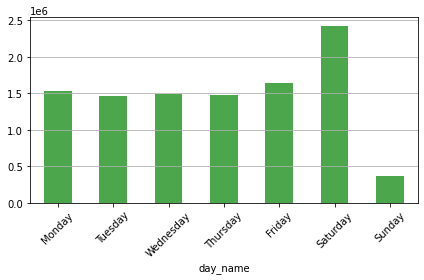

In [0]:
df_over_days = df.groupby('day_name')['amount','weekday'].\
agg(['sum','last'])[[('amount','sum'), ('weekday','last')]]
df_over_days.columns = [col[0] for col in df_over_days.columns.values]
df_over_days

ax = df_over_days.\
    reset_index().\
    sort_values('weekday').\
    plot('day_name','amount', 'bar', legend= False, rot=45, color = 'g', alpha = 0.7)
ax.grid(axis='y')
ax.figure.tight_layout()
ax.figure.savefig('over_days.png')

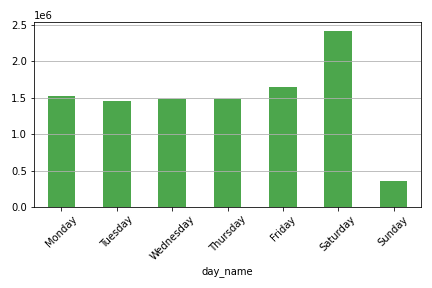

In [0]:
from IPython.display import Image
Image('over_days.png')

### Produce graph over week days 

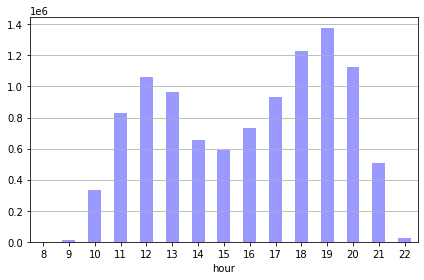

In [0]:
ax = df_over_hours = df.groupby('hour')['amount'].sum().reset_index().\
sort_values('hour').\
plot('hour','amount', 'bar', legend= False, rot=0,  color = 'blue', alpha = 0.4)

ax.grid(axis='y')
ax.figure.tight_layout()
ax.figure.savefig('over_hours.png')

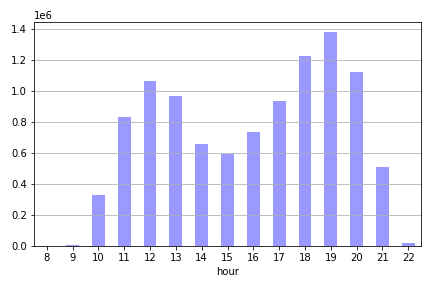

In [0]:
Image('over_hours.png')

## Task 2. 
Find the store with the most sales in amount

In [0]:
df.head()

,SWID,ReceiptNumber,TransactionId,BeginDateTime,TransactionGrandAmount,TotalItemCount,Amount,ReferenceId,MerchCat,SizeId,ItemPID,date,amount,day_name,weekday,hour
0,Z01681,29804,19733859,2017-01-09 09:29,12,2,7,392 588 003 163 029,255,1141.0,392588,2017-01-09 09:29:00,7.00,Monday,0,9
1,Z01681,29804,19733859,2017-01-09 09:29,12,2,5,406 593 005 164 029,334,1126.0,406593,2017-01-09 09:29:00,5.00,Monday,0,9
2,Z00427,25104,19734451,2017-01-09 09:41,5,1,5,384 749 002 163 027,269,1162.0,384749,2017-01-09 09:41:00,5.00,Monday,0,9
3,Z00422,20846,19734547,2017-01-09 09:42,"29,97",6,"6,66",390 085 001 164 034,481,58.0,390085,2017-01-09 09:42:00,6.66,Monday,0,9
4,Z00422,20846,19734547,2017-01-09 09:42,"29,97",6,"6,66",390 085 008 164 034,481,58.0,390085,2017-01-09 09:42:00,6.66,Monday,0,9


In [0]:
top_sales_merch_cat = df.groupby('MerchCat')['amount'].sum().\
reset_index().\
sort_values('amount', ascending = False).\
iloc[0]
print ('Store with the most sales in amount:\n\t "MerchCat" = {}, (amount = {:,.2f})'.format(
    top_sales_merch_cat.MerchCat, top_sales_merch_cat.amount))

Store with the most sales in amount:
	 "MerchCat" = 244, (amount = 261,399.57)


## Task 3. 
Find the item with the highest sales in quantity

In [0]:
top_item = df.groupby('ItemPID')['amount'].sum().\
reset_index().\
sort_values('amount', ascending = False).\
iloc[0]
print ('Item with the highest sales:\n\t"ItemPID" = {}, (amount = {:,.2f})'.\
       format(top_item.ItemPID, top_item.amount))

Item with the highest sales:
	"ItemPID" = 308068, (amount = 93,270.86)


## Task 4. 
What is the average and standard deviation of sales quantity of the most sold item in the store with the highest sales (same as above) on Fridays at 14:00 hours.

In [0]:
df_fr= df[((df.MerchCat == top_sales_merch_cat.MerchCat)&
           (df.ItemPID == top_item.ItemPID) &
           (df.day_name == 'Friday')&
           (df.hour == 14)
          )]\
    [['amount', 'day_name', 'weekday', 'hour', 'ItemPID', 'MerchCat']]
df_fr.head(10)

,amount,day_name,weekday,hour,ItemPID,MerchCat
132754,7.99,Friday,4,14,308068,244
132867,7.99,Friday,4,14,308068,244
133011,7.99,Friday,4,14,308068,244
133020,7.99,Friday,4,14,308068,244
133162,7.99,Friday,4,14,308068,244
133164,7.99,Friday,4,14,308068,244
133230,7.99,Friday,4,14,308068,244
133238,7.99,Friday,4,14,308068,244
133239,7.99,Friday,4,14,308068,244
133310,7.99,Friday,4,14,308068,244


In [0]:
df_fr.amount.describe()

count    119.000000
mean       7.208571
std        1.144164
min        3.000000
25%        5.590000
50%        7.990000
75%        7.990000
max        7.990000
Name: amount, dtype: float64

In [0]:
print ('For the most sold item in the store with\
 the highest sales on Fridays at 14:00 hours:\
\n\taverage of sales quantity = {:,.2f}\
\n\tstandard deviation = {:,.2f}'.\
       format(df_fr.amount.mean(),df_fr.amount.std()))

For the most sold item in the store with the highest sales on Fridays at 14:00 hours:
	average of sales quantity = 7.21
	standard deviation = 1.14


## Task 5.
Collect some statistics about the data

### Get general information

In [0]:
df.dtypes

SWID                              object
ReceiptNumber                      int64
TransactionId                      int64
BeginDateTime                     object
TransactionGrandAmount            object
TotalItemCount                     int64
Amount                            object
 ReferenceId                      object
MerchCat                          object
SizeId                           float64
ItemPID                           object
date                      datetime64[ns]
amount                           float64
day_name                          object
weekday                            int64
hour                               int64
dtype: object

In [0]:
df.describe()

,ReceiptNumber,TransactionId,TotalItemCount,SizeId,amount,weekday,hour
count,922451.000000,9.224510e+05,922451.000000,922210.000000,922451.000000,922451.000000,922451.000000
mean,19157.099488,2.186183e+07,5.198762,869.819578,11.241441,2.860125,15.910418
std,5568.869269,1.209392e+06,5.148741,644.516957,7.461992,1.847283,3.292151
min,9878.000000,1.973386e+07,-3.000000,1.000000,0.250000,0.000000,8.000000
25%,14498.000000,2.087976e+07,2.000000,62.000000,5.990000,1.000000,13.000000
50%,18462.000000,2.181571e+07,4.000000,968.000000,9.990000,3.000000,16.000000
75%,23776.000000,2.289203e+07,6.000000,1165.000000,14.990000,5.000000,19.000000
max,29874.000000,2.397971e+07,85.000000,2549.000000,129.000000,6.000000,22.000000


### Statistic by amount in receipts 

In [0]:
df.groupby('ReceiptNumber').amount.sum().describe().apply(lambda x: '{:,.2f}'.format(x)).to_frame()

,amount
count,"9,999.00"
mean,"1,037.07"
std,270.01
min,409.96
25%,834.31
50%,998.19
75%,"1,213.58"
max,"2,217.17"


### Statistic of amount in transaction 

In [0]:
df.groupby('TransactionId').amount.sum().describe().apply(lambda x: '{:,.2f}'.format(x)).to_frame()

,amount
count,"338,279.00"
mean,30.65
std,30.72
min,0.37
25%,11.25
50%,19.99
75%,38.97
max,"1,098.75"


### Statistic of total items count in transaction 

In [0]:
df.groupby('TransactionId').TotalItemCount.last().describe().apply(lambda x: '{:,.0f}'.format(x)).to_frame()

,TotalItemCount
count,"338,279"
mean,3
std,3
min,-3
25%,1
50%,2
75%,3
max,85


### Top 5 the least utilized SWID bt amount 

In [0]:
df.groupby('SWID').amount.sum().sort_values().reset_index().head(5)

,SWID,amount
0,Z00465,25.97
1,Z01625,154.96
2,Z01557,2216.64
3,Z00466,3027.37
4,Z00167,4824.32


### Enrich the datetime data  

In [0]:
df['year'] = df['date'].dt.year
df['month']=  df['date'].dt.month
df['month_name']=  df['date'].dt.month_name()
df['week']=  df['date'].dt.week
df['day']=  df['date'].dt.day

df.iloc[:,-10:].head(10)

,date,amount,day_name,weekday,hour,year,month,month_name,week,day
0,2017-01-09 09:29:00,7.00,Monday,0,9,2017,1,January,2,9
1,2017-01-09 09:29:00,5.00,Monday,0,9,2017,1,January,2,9
2,2017-01-09 09:41:00,5.00,Monday,0,9,2017,1,January,2,9
3,2017-01-09 09:42:00,6.66,Monday,0,9,2017,1,January,2,9
4,2017-01-09 09:42:00,6.66,Monday,0,9,2017,1,January,2,9
5,2017-01-09 09:42:00,6.66,Monday,0,9,2017,1,January,2,9
6,2017-01-09 09:42:00,3.33,Monday,0,9,2017,1,January,2,9
7,2017-01-09 09:42:00,3.33,Monday,0,9,2017,1,January,2,9
8,2017-01-09 09:42:00,3.33,Monday,0,9,2017,1,January,2,9
9,2017-01-09 09:43:00,5.00,Monday,0,9,2017,1,January,2,9


### Statistics of total amount over months


In [0]:
# Investigate years 
df.year.unique()

array([2017])

In [0]:
df.groupby(['month', 'month_name']).amount.sum().\
apply(lambda x: '{:,.2f}'.format(x)).to_frame()


,,amount
month,month_name,
1,January,"8,297,980.82"
2,February,"2,071,697.55"


### Statistics of total amount over weeks

In [0]:
df.groupby(['week']).amount.sum().\
apply(lambda x: '{:,.2f}'.format(x)).to_frame()

,amount
week,
2,"2,137,552.51"
3,"2,820,567.09"
4,"2,596,693.29"
5,"2,814,865.48"


### Statistics of transactions over days

In [0]:
df.groupby(['month','month_name','day']).TransactionId.count().apply(lambda x: '{:,.0f}'.format(x)).to_frame()


TransactionId
month month_name day              
1     January    9          32,622
                 10         29,966
                 11         29,671
                 12         27,541
                 13         33,233
                 14         40,235
                 15          5,095
                 16         31,609
                 17         33,175
                 18         37,789
                 19         40,096
                 20         44,124
                 21         61,667
                 22          9,380
                 23         38,618
                 24         37,277
                 25         32,930
                 26         32,050
                 27         31,429
                 28         44,940
                 29          6,350
                 30         33,728
                 31         28,869
2     February   1          30,233
                 2          33,765
                 3          38,452
                 4          66,318
                 5          11,289

In [0]:
df.groupby(['month','month_name','day']).TransactionId.count().describe().apply(lambda x: '{:,.0f}'.format(x)).to_frame()

,TransactionId
count,28
mean,"32,945"
std,"13,612"
min,"5,095"
25%,"29,892"
50%,"33,052"
75%,"38,494"
max,"66,318"


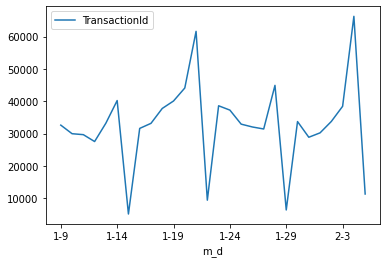

In [0]:
df_TransactionId = df.groupby(['month','month_name','day']).TransactionId.count().reset_index()
df_TransactionId['m_d'] =  df_TransactionId.apply(lambda row: '-'.join([str(row['month']),str(row.day)]), axis=1)
df_TransactionId.plot('m_d','TransactionId')

### Top most popular items over weekdays 

In [0]:
def int_format(x):
    return '{:,.0f}'.format(x)
day_to_name = dict (zip(list(df['weekday'].unique()),list (df['day_name'].unique())))

for i in range (7):
    print (f'Top 5 most popular items for {day_to_name[i]}')
    df_day = df[df.weekday==i]
    print (df_day.assign(total_count=1).groupby('ItemPID').total_count.count().sort_values(ascending = False).head(5).apply(int_format).to_frame())




Top 5 most popular items for Monday
        total_count
ItemPID            
308068        1,877
390092        1,865
306259        1,842
381216        1,669
372867        1,221
Top 5 most popular items for Tuesday
        total_count
ItemPID            
306259        1,857
390092        1,853
308068        1,707
381216        1,633
372867        1,304
Top 5 most popular items for Wednesday
        total_count
ItemPID            
390092        2,005
308068        1,867
306259        1,799
381216        1,793
372867        1,239
Top 5 most popular items for Thursday
        total_count
ItemPID            
308068        1,969
306259        1,900
381216        1,799
390092        1,614
372867        1,211
Top 5 most popular items for Friday
        total_count
ItemPID            
308068        2,087
381216        1,963
306259        1,954
390092        1,889
372867        1,297
Top 5 most popular items for Saturday
        total_count
ItemPID            
381216        3,313
306259        2,

### Statistic of duplicated records 

In [0]:
def get_duplicated_columns_keys(df, key_columns):
    df= df.copy()
    df['temp']= 1
    df_grouped = df.groupby(key_columns)['temp'].agg(['count'])
    df_keys_duplicated = df_grouped[df_grouped['count'] > 1]
    print('Number of duplicated keys =  {:,}'.format(len(df_keys_duplicated)))
    return df_keys_duplicated

duplicates = get_duplicated_columns_keys(df_origin, key_columns= list(df_origin))
duplicates['count'].describe().to_frame()

Number of duplicated keys =  14,327


,count
count,14327.000000
mean,2.129964
std,0.699714
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,34.000000


### Top 5 SWID that produce duplicated records 

In [0]:
duplicates.reset_index().groupby('SWID')['count'].sum().sort_values(ascending=False).to_frame().head(5)

,count
SWID,
Z00273,604
Z00272,589
Z01685,536
Z003613,459
Z00271,452



# Mission 2 

The task is to define or explain what tools, models and architecture you would recommend for the following tasks.
An important part of the infrastructure is to utilize tools available in the google cloud platform, but you also have to consider the costs and argue for alternatives to be used if needed.
It would be nice if you can make a drawing of the architecture/solution.
## Task 6

**Visual recognition.**
Imagine your customer at the self-checkout, he's got a selection of root vegetables but wonders which one is the root celery, parsnip and rutabaga? Even the pomegranate can be hard to find using the search function, especially if you're unsure of the name.. The queue behind him is impatient. Wouldn't it be wonderful if the machine suggested the most likely item for him? He'd save time (and face) and he'd be a happier customer and you'd get more customers through the checkout. Some customers might even be tempted to just select something that looks similar not caring too much if the price is right - and you'd potentially lose money.


Pure GCP solution would include: 
- Google Cloud Storage to keep the labeled images for training model 
- Google AutoML Vision to train a custom model to classify images, and then 
export the trained model to use on Edge devices (Android, iOS, or Raspberry Pi 3)

However, in this case there are following disadvantages:
- (-) You have limited configuration for training model (e.g model type, layers, hyperparameters etc.)
- (-) The cost may appear over expensive (3.15 USD per node hour, e.g. training a Cloud Image Classification model may take up to 60 node hours for for experimental  use and resumable training = ~ 190.00 USD). In case of no appropriate device to deploy the trained model, it's going to require deployment in cloud which will cause additional cost for prediction
- (-) It requires to investigate how to obtain not only predicted class but probabilities of of ther classes to suggest the customer several options since it may become convenient feature.
- (-) Unexpected impediments may encounter due to AutoML Vision is not such practiced as leverage of keras/tensorflow models. 

Instead, I would consider using pre-trained ImageNet model (e.g. VGG16, ResNet50, etc.) developed on Keras/tensorflow and use Google Cloud Compute Engine for transfer knowledge training /fine traing e.g. n1-highmem-8 which costs 0.4736 / 0.1 USD (which is regular/preemptible correspondingly). Training model  may take 8-16 hours.

In case of need faster train model on larger data set, Colud Big Data tools could be used e.g. SparkML jobs using Cloud Dataproc.

This approach has the following pros and cons:
 - (+) Ability to change model type, manage training process, etc.
 - (+) Reduse cost (comparing to AutoML Vision, including option not to use Google Storage)
 - (+) convert the trained model to desired format to run on devices e.g.  TensorFlow.js etc. the same as trained model by AutoML Vision
 - (+) May bring better quality (accuracy etc.) due to more experiments  and flexability in model structure and configuring hyper parameters
 - (+) Flexability with prediction results e.g. suggest several top probable classes  instaed of one more likely predicted class  
 - (-) May require more efforts and more skilled data scientist


Both approaches would require to collect the labeled data from the domain images distribution, both use knowledge transfer, and both allow to convert the trained model to desired format. Even the first approach accepts the direct deployment of trained model in cloud, the other approach may be manually  deployed to cloud too, but the option of using the model deployed on cloud for prediction may become unappropriate due to high latency. 

Towards customers who might be tempted to just select something that looks similar not caring too much if the price is right, the system may warn customer about wrong intention and bring attention of human staff or cashier  (e.g. sound or by marking the warning notice on the sticker)

All such cases altogether with correct prediction of real images may be used for re-training model. 


## Image classification model development diagram 

In [0]:
!wget https://www.dropbox.com/s/6c1vlq3gnatdk5f/classify_images.png?dl=0 -O classify_images1.png

--2020-04-23 10:14:52--  https://www.dropbox.com/s/6c1vlq3gnatdk5f/classify_images.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/6c1vlq3gnatdk5f/classify_images.png [following]
--2020-04-23 10:14:52--  https://www.dropbox.com/s/raw/6c1vlq3gnatdk5f/classify_images.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8e6ccb9c7462039ee0d18286d0.dl.dropboxusercontent.com/cd/0/inline/A2bDCbREHNY5It-4My5lQ69zOP0Wmc9nQHlpjTHGT0Ga4Kfzv1qUZxO7IskzNxCtUUqJZuzWddAMNl_y9Q1sqwyG7UnI_J3XOgxjlcr2HzvJdCF5bcM979oQovnB6S4Rom4/file# [following]
--2020-04-23 10:14:52--  https://uc8e6ccb9c7462039ee0d18286d0.dl.dropboxusercontent.com/cd/0/inline/A2bDCbREHNY5It-4My5lQ69zOP0Wmc9nQHlpjTHGT0Ga4Kfzv1qUZxO7IskzNxCtUUqJZuzWddAMNl_y9Q1sqwyG

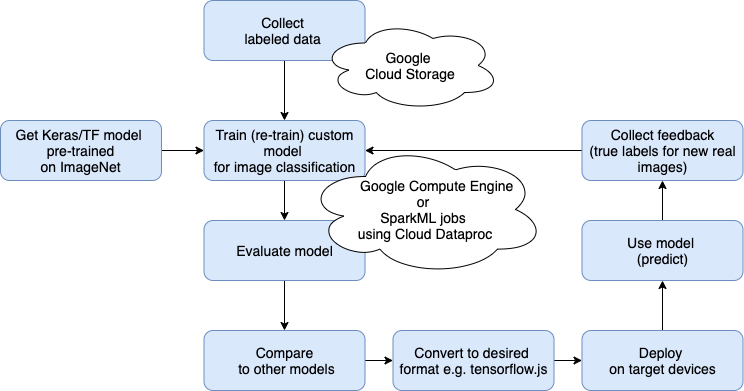

In [0]:
Image('/content/classify_images1.png')

# Mission 3.
Detection of abnormalities or strange behavior is important in order to understand cashiers' way of working. The purpose can be either to detect the need for training or potential risk of fraud.
You should use data provided in the file: ExtendaDataSet_02.zip
This dataset contains 3 months of aggregated data per hour, store and cashier. In total 1.765.939 records 

## Task 7.
What approach would you use in order to detect patterns and abnormalities in this dataset?
Make a short presentation or a document to explain the approach and potential outcome.

There are 2 main type of anomalies  
- individual anomalies (to detect single anomaly records) 
- group anomalies (to capture multiple anomaly records, that  are actually similar to each other forming certain pattern)


One of approaches consists of the following process of 2 steps: 
- identify individual records with anomalous attribute values
- detect patterns where the number of anomalous records is higher than expected

Detect individual anomalies approach:
1. Except existing features generate new features that may indicate the anomalies due to business domain.
2. estimate parameters of multi variate Gaussian distribution for selected 
features for training set records 
3. Being based on estimated normal distribution, compute probabiliies of every record  
4. Evaluate model by selecting $\epsilon$ that has best f1-score on validation set 
5. Mark record as anomaly if $p < \epsilon$ 


### Use cases

I see 2 types of individual anomalies: 

1. Detect anomaly time frame (hour/day/etc.) within list of simialar time frames for specified/all stores
2. Detect anomaly cashier/store within list of cachiers/stores for specified/all time period.

    
Note: There are lot of other possible use caases that may be implemented on demand e.g. detect anomaly cashier within the same store, detect anomalies for  aggrigated hours(before noon/ after noon), using different features, global anomalies for all days/stores  etc.


Another approach that may detect pattern is clustering. It requires either  to provide number of clusters (e.g. K-means) or provide some criteria of linking records into cluster  (e.g. Agglomerative (Hierarchical) clustering, DBSCAN)

In order to speedup performance PCA may reduce number of considered features.
PCA also may be used for 2-d visualization as well as t-SNE.



## Task 8

Use ML in order to detect patterns that can be of interest. 

Could be to look at Number related columns such as :
```
NumberOfReceiptsCorrected 
NumberOfSelectedCorrections
NumberOfLastCorrections
NumberOfArticlesSoldWithAgeControl
TotalNumberOfAgeControlsApproved
TotalNumberOfAgeControlsNotApproved
NumberOfReceiptsWithSale
NumberOfReceiptsWithReturn
NumberOfReceiptsParked
NumberOfReceiptsCanceled
NumberOfPriceInquiries
NumberOfPriceOverrides
NumberOfReceiptsWithZeroSales
```
Is there any similarities or pattern, would it be possible to repeatedly reveal price inquiries, cancelations and price overrides which form a pattern related to specific weekdays, cashiers or stores?

In [0]:
import pandas as pd 

### Read the data 

In [1]:
!wget https://www.dropbox.com/s/w4ppc9qtuvn8qu7/ExtendaDataSet_02.zip?dl=0

--2020-04-23 12:58:13--  https://www.dropbox.com/s/w4ppc9qtuvn8qu7/ExtendaDataSet_02.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/w4ppc9qtuvn8qu7/ExtendaDataSet_02.zip [following]
--2020-04-23 12:58:13--  https://www.dropbox.com/s/raw/w4ppc9qtuvn8qu7/ExtendaDataSet_02.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3ed6ee88037f949a7fc1683f86.dl.dropboxusercontent.com/cd/0/inline/A2Yu5IDocTCWyO-bTl8CHEv8xECCyBJWpcDR2RlLV42D4JR4KmH_7iQfrMU74Lv1JwRV4I0AsasvB_KGiMD3C_xXiUaKHgE7kWkxLjI8CT0FX9AylH1o4DHki1aFQKX0Brg/file# [following]
--2020-04-23 12:58:14--  https://uc3ed6ee88037f949a7fc1683f86.dl.dropboxusercontent.com/cd/0/inline/A2Yu5IDocTCWyO-bTl8CHEv8xECCyBJWpcDR2RlLV42D4JR4KmH_7iQfrMU74Lv1JwRV4I0AsasvB_KGiM

In [0]:
!unzip -uq "/content/ExtendaDataSet_02.zip?dl=0" -d "/content/dataset2"

In [4]:
df = pd.read_csv('/content/dataset2/CashierBehaviourData.csv', sep=';')
df.sample (10)

,ReceiptDate,ReceiptHour,StoreId,CashierId,CashRegisterNo,Pos3rdPartySalesAmount,NumberOfScannedArticles,NumberOfScannableArticles,NumberOfReceiptsCorrected,NumberOfSelectedCorrections,SelectedCorrectionsAmount,NumberOfLastCorrections,LastCorrectionsAmount,NumberOfArticlesWithGenericGtinInReturn,NumberOfReceiptsWithGenericGtinInReturn,GenericGtinReturnAmount,TotalNumberOfAgeControlsApproved,TotalNumberOfAgeControlsNotApproved,NumberOfAgeControlsApprovedByFingerprints,NumberOfAgeControlsNotApprovedByFingerprints,NumberOfArticlesSoldWithAgeControl,NumberOfAgeControlsClearlyOldEnough,NumberOfReceiptsWithCustomerWarrantyPayout,NumberOfArticlesWithCustomerWarrantyActive,NumberOfArticlesWithCustomerWarrantyPayout,CustomerWarrantyPayoutAmount,SalesAmount,ReturnAmount,BottleDepositSalesAmount,BottleDepositReturnAmount,BottleDepositManualReturnAmount,NumberOfReceiptsWithBottleDepositManualReturn,NumberOfReceipts,NumberOfReceiptsWithSale,NumberOfReceiptsWithReturn,NumberOfReceiptsWith3rdPartySales,NumberOfReceiptsWithOnly3rdPartySales,NumberOfReceiptsWithout3rdPartySales,NumberOfReceiptsParked,NumberOfReceiptsCanceled,Pos3rdPartyReturnAmount,NumberOf3rdPartyScannedArticles,NumberOf3rdPartyScannableArticles,PriceOverrideDiscountAmount,ParkedReceiptSumTotalAmount,NumberOfDrawerOpenings,NumberOfPriceInquiries,NumberOfPriceOverrides,NumberOfReceiptsWithZeroSales,QuantityOfArticlesWithGenericGtinInReturn,QuantityOfArticlesSoldWithAgeControl,QuantityOfArticlesWithCustomerWarrantyActive,QuantityOfArticlesWithCustomerWarrantyPayout,CanceledReceiptsAmount
594998,20150311,11,73945,9371,1,0.0,194,265,0,0,0.0,0,0.00,0,0,0.0,0,0,0,0,0,11,0,0,0,0.0,7351.9500,0.0,95.0,-90.0,0.0,0,37,37,0,0,0,37,0,0,0.0,0,0,0.0,0.00,0,0,0,1,0,0,0,0,0.00
1566314,20150328,10,74618,4828,1,0.0,233,262,2,0,0.0,2,84.32,0,0,0.0,0,0,0,0,0,5,6,0,358,0.0,7994.3900,0.0,107.0,-166.0,0.0,0,26,26,0,0,0,26,0,0,0.0,0,0,0.0,0.00,12,0,0,0,0,0,0,358,0.00
1331527,20150112,17,73785,348,2,0.0,366,425,2,0,0.0,2,11.60,0,0,0.0,0,0,0,0,0,8,0,0,0,0.0,15897.5799,0.0,244.5,-245.5,0.0,0,37,37,0,0,0,37,2,1,0.0,0,0,0.0,690.30,4,0,0,7,0,0,0,0,1148.40
1476991,20150206,15,74359,1769,2,0.0,208,267,4,1,22.5,4,118.50,0,0,0.0,0,0,0,0,0,1,0,0,0,0.0,6381.3100,-28.3,23.0,0.0,0.0,0,50,49,1,0,0,49,1,1,0.0,0,0,0.0,297.78,1,0,0,19,0,0,0,0,11.78
739391,20150222,13,73836,4472,2,0.0,159,212,2,0,0.0,2,48.23,0,0,0.0,0,0,0,0,0,2,0,0,0,0.0,6204.6100,0.0,41.0,-15.0,0.0,0,22,22,0,0,0,22,0,0,0.0,0,0,0.0,0.00,5,0,0,8,0,0,0,0,0.00
387291,20150209,20,73640,7297,2,0.0,3,3,0,0,0.0,0,0.00,0,0,0.0,0,0,0,0,0,1,0,0,0,0.0,161.9000,0.0,3.0,0.0,0.0,0,1,1,0,0,0,1,0,0,0.0,0,0,0.0,0.00,0,0,0,1,0,0,0,0,0.00
1441764,20150111,13,73657,2991,1,0.0,622,752,4,0,0.0,6,72.95,0,0,0.0,0,0,0,0,0,11,0,0,0,0.0,21304.2500,-4.9,141.0,-125.5,0.0,0,52,52,1,0,0,52,0,0,0.0,0,0,0.0,0.00,2,0,0,22,0,0,0,0,0.00
1529926,20150320,8,74535,6396,1,0.0,160,198,1,0,0.0,1,33.90,0,0,0.0,0,0,0,0,0,14,15,0,872,0.0,6118.5000,0.0,70.0,-46.0,0.0,0,34,34,0,0,0,34,0,0,0.0,0,0,0.0,0.00,7,0,0,2,0,0,0,872,0.00
68441,20150301,18,74102,10925,1,0.0,16,18,0,0,0.0,0,0.00,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,434.7000,0.0,21.0,0.0,0.0,0,4,4,0,0,0,4,0,0,0.0,0,0,0.0,0.00,1,0,0,1,0,0,0,0,0.00
99114,20150212,12,73592,1629,2,0.0,15,18,0,0,0.0,0,0.00,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,448.4000,0.0,0.0,0.0,0.0,0,2,2,0,0,0,2,0,0,0.0,0,0,0.0,0.00,0,0,0,0,0,0,0,0,0.00


### Overview the data 

In [5]:
list(df)

['ReceiptDate',
 'ReceiptHour',
 'StoreId',
 'CashierId',
 'CashRegisterNo',
 'Pos3rdPartySalesAmount',
 'NumberOfScannedArticles',
 'NumberOfScannableArticles',
 'NumberOfReceiptsCorrected',
 'NumberOfSelectedCorrections',
 'SelectedCorrectionsAmount',
 'NumberOfLastCorrections',
 'LastCorrectionsAmount',
 'NumberOfArticlesWithGenericGtinInReturn',
 'NumberOfReceiptsWithGenericGtinInReturn',
 'GenericGtinReturnAmount',
 'TotalNumberOfAgeControlsApproved',
 'TotalNumberOfAgeControlsNotApproved',
 'NumberOfAgeControlsApprovedByFingerprints',
 'NumberOfAgeControlsNotApprovedByFingerprints',
 'NumberOfArticlesSoldWithAgeControl',
 'NumberOfAgeControlsClearlyOldEnough',
 'NumberOfReceiptsWithCustomerWarrantyPayout',
 'NumberOfArticlesWithCustomerWarrantyActive',
 'NumberOfArticlesWithCustomerWarrantyPayout',
 'CustomerWarrantyPayoutAmount',
 'SalesAmount',
 'ReturnAmount',
 'BottleDepositSalesAmount',
 'BottleDepositReturnAmount',
 'BottleDepositManualReturnAmount',
 'NumberOfReceiptsWithB

In [6]:
df.describe()

,ReceiptDate,ReceiptHour,StoreId,CashierId,CashRegisterNo,Pos3rdPartySalesAmount,NumberOfScannedArticles,NumberOfScannableArticles,NumberOfReceiptsCorrected,NumberOfSelectedCorrections,SelectedCorrectionsAmount,NumberOfLastCorrections,LastCorrectionsAmount,NumberOfArticlesWithGenericGtinInReturn,NumberOfReceiptsWithGenericGtinInReturn,GenericGtinReturnAmount,TotalNumberOfAgeControlsApproved,TotalNumberOfAgeControlsNotApproved,NumberOfAgeControlsApprovedByFingerprints,NumberOfAgeControlsNotApprovedByFingerprints,NumberOfArticlesSoldWithAgeControl,NumberOfAgeControlsClearlyOldEnough,NumberOfReceiptsWithCustomerWarrantyPayout,NumberOfArticlesWithCustomerWarrantyActive,NumberOfArticlesWithCustomerWarrantyPayout,CustomerWarrantyPayoutAmount,SalesAmount,ReturnAmount,BottleDepositSalesAmount,BottleDepositReturnAmount,BottleDepositManualReturnAmount,NumberOfReceiptsWithBottleDepositManualReturn,NumberOfReceipts,NumberOfReceiptsWithSale,NumberOfReceiptsWithReturn,NumberOfReceiptsWith3rdPartySales,NumberOfReceiptsWithOnly3rdPartySales,NumberOfReceiptsWithout3rdPartySales,NumberOfReceiptsParked,NumberOfReceiptsCanceled,Pos3rdPartyReturnAmount,NumberOf3rdPartyScannedArticles,NumberOf3rdPartyScannableArticles,PriceOverrideDiscountAmount,ParkedReceiptSumTotalAmount,NumberOfDrawerOpenings,NumberOfPriceInquiries,NumberOfPriceOverrides,NumberOfReceiptsWithZeroSales,QuantityOfArticlesWithGenericGtinInReturn,QuantityOfArticlesSoldWithAgeControl,QuantityOfArticlesWithCustomerWarrantyActive,QuantityOfArticlesWithCustomerWarrantyPayout,CanceledReceiptsAmount
count,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1765939.0,1765939.0,1.765939e+06,1.765939e+06,1765939.0,1.765939e+06,1765939.0,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1.765939e+06,1765939.0,1.765939e+06,1.765939e+06,1765939.0,1765939.0,1.765939e+06,1.765939e+06
mean,2.015022e+07,1.463982e+01,7.410658e+04,6.234009e+03,1.956339e+00,3.802531e+00,1.775103e+02,2.200092e+02,1.034117e+00,1.644581e-01,7.073706e+00,1.340436e+00,5.070118e+01,9.727969e-03,9.184349e-03,-2.179006e+00,6.171787e-03,1.092903e-04,2.056187e-02,0.0,0.0,4.580183e+00,1.933350e+00,0.0,1.193602e+02,0.0,6.336371e+03,-1.233270e+01,6.775767e+01,-7.412176e+01,-1.341688e+00,2.024589e-02,2.535721e+01,2.532365e+01,9.741163e-02,1.402257e-02,5.206862e-03,2.530963e+01,2.200348e-01,1.308528e-01,-3.064545e-02,2.919693e-03,1.621800e-02,2.557077e+00,7.904252e+01,2.941892e+00,5.934520e-02,0.0,4.490606e+00,9.727969e-03,0.0,0.0,1.193602e+02,1.076328e+05
std,8.276523e+01,4.139917e+00,3.763449e+02,3.564695e+03,1.252852e+00,8.227455e+01,1.683877e+02,2.070677e+02,1.475366e+00,1.764018e+00,2.567015e+02,6.932269e+00,1.037213e+03,1.123785e-01,1.004087e-01,1.158829e+02,9.848322e-02,1.072106e-02,2.223847e-01,0.0,0.0,5.072642e+00,5.429116e+00,0.0,3.399846e+02,0.0,6.029633e+03,2.273106e+02,8.026310e+01,1.764467e+02,9.628232e+01,2.134174e-01,2.242671e+01,2.240579e+01,3.365142e-01,1.223512e-01,7.497629e-02,2.239560e+01,7.582798e-01,4.335691e-01,3.150985e+00,3.457658e-01,3.699178e-01,1.042483e+02,7.446229e+02,4.282243e+00,4.184948e-01,0.0,5.764326e+00,1.123785e-01,0.0,0.0,3.399846e+02,1.430065e+08
min,2.015010e+07,0.000000e+00,7.352000e+04,2.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.991000e+04,0.000000e+00,-1.430083e+05,0.000000e+00,0.000000e+00,-5.238741e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,-1.504350e+04,-8.070448e+04,0.000000e+00,-1.001710e+05,-9.992900e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1

In [7]:
df.isnull().any()

ReceiptDate                                      False
ReceiptHour                                      False
StoreId                                          False
CashierId                                        False
CashRegisterNo                                   False
Pos3rdPartySalesAmount                           False
NumberOfScannedArticles                          False
NumberOfScannableArticles                        False
NumberOfReceiptsCorrected                        False
NumberOfSelectedCorrections                      False
SelectedCorrectionsAmount                        False
NumberOfLastCorrections                          False
LastCorrectionsAmount                            False
NumberOfArticlesWithGenericGtinInReturn          False
NumberOfReceiptsWithGenericGtinInReturn          False
GenericGtinReturnAmount                          False
TotalNumberOfAgeControlsApproved                 False
TotalNumberOfAgeControlsNotApproved              False
NumberOfAg

### Enrich data 

In [8]:
df['date']= pd.to_datetime(df.ReceiptDate.apply(lambda x : '-'.join([str(x)[:4],str(x)[4:6],str(x)[6:]])))
df['day_name'] = df['date'].dt.day_name()
# df['weekday']=  df['date'].dt.weekday
df[['ReceiptDate','date','day_name']].sample(10)

,ReceiptDate,date,day_name
1078416,20150302,2015-03-02,Monday
1229298,20150117,2015-01-17,Saturday
1714593,20150322,2015-03-22,Sunday
732887,20150202,2015-02-02,Monday
849730,20150122,2015-01-22,Thursday
46946,20150128,2015-01-28,Wednesday
137718,20150201,2015-02-01,Sunday
1448956,20150202,2015-02-02,Monday
205127,20150109,2015-01-09,Friday
1337010,20150118,2015-01-18,Sunday


### Get subset of provided data
Considering the weekdays may differ, let's take one weekday data e.g. most loaded day due to NumberOfScannedArticles


In [9]:
df_weekday = df.groupby(['day_name'])['NumberOfScannedArticles'].sum().\
    sort_values(ascending= False).to_frame()
top_weekday = df_weekday.index.values[0]
print ('top_weekday=', top_weekday)
df_weekday.head()

top_weekday= Monday


,NumberOfScannedArticles
day_name,
Monday,67739022
Sunday,67018135
Wednesday,47336155
Saturday,46422163
Friday,42861428


In [10]:
df_top_weekday = df[df.day_name==top_weekday]
print (f'len(df_top_weekday)={len(df_top_weekday):,}')

len(df_top_weekday)=308,857


### Select features 

In [11]:

suggested_features= [
    'NumberOfReceiptsCorrected', 
    'NumberOfSelectedCorrections',
    'NumberOfLastCorrections',
    'NumberOfArticlesSoldWithAgeControl',
    'TotalNumberOfAgeControlsApproved',
    'TotalNumberOfAgeControlsNotApproved',
    'NumberOfReceiptsWithSale',
    'NumberOfReceiptsWithReturn',
    'NumberOfReceiptsParked',
    'NumberOfReceiptsCanceled',
    'NumberOfPriceInquiries',
    'NumberOfPriceOverrides',
    'NumberOfReceiptsWithZeroSales',
]

def get_features(df):
    df= df.copy()
    df['NumberOfReceipts_rel'] = df['NumberOfReceiptsWithReturn']/(df.NumberOfReceipts+1)
    df['NumberOfScannedArticles_rel'] = df.NumberOfScannedArticles/ (df.NumberOfScannableArticles+1)
    df['NumberOfAgeControlsClearlyOldEnough_rel'] = df.NumberOfAgeControlsClearlyOldEnough/(df.NumberOfArticlesSoldWithAgeControl+1)
    cols = suggested_features + [
        'NumberOfReceipts_rel', 
        'NumberOfScannedArticles_rel',
        'NumberOfAgeControlsClearlyOldEnough_rel']
    return  df[cols]
    

df_target = get_features(df_top_weekday)
df_target.sample(10)

,NumberOfReceiptsCorrected,NumberOfSelectedCorrections,NumberOfLastCorrections,NumberOfArticlesSoldWithAgeControl,TotalNumberOfAgeControlsApproved,TotalNumberOfAgeControlsNotApproved,NumberOfReceiptsWithSale,NumberOfReceiptsWithReturn,NumberOfReceiptsParked,NumberOfReceiptsCanceled,NumberOfPriceInquiries,NumberOfPriceOverrides,NumberOfReceiptsWithZeroSales,NumberOfReceipts_rel,NumberOfScannedArticles_rel,NumberOfAgeControlsClearlyOldEnough_rel
515623,0,0,0,0,0,0,6,0,0,0,0,0,3,0.000000,0.900000,0.0
1764448,4,0,6,0,0,0,81,0,5,1,1,0,1,0.000000,0.762208,10.0
508283,0,0,0,0,0,0,32,0,0,0,0,0,4,0.000000,0.829710,11.0
1621985,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000000,0.930233,0.0
1722178,5,0,6,0,0,0,47,0,0,0,0,0,0,0.000000,0.794168,15.0
1722194,2,0,3,0,0,0,67,3,1,0,2,0,2,0.042254,0.781250,8.0
1227471,5,1,7,0,0,0,37,0,0,1,0,0,6,0.000000,0.843621,13.0
97893,0,0,0,0,0,0,2,0,0,0,0,0,0,0.000000,0.500000,0.0
266350,2,0,2,0,0,0,60,0,1,0,0,0,14,0.000000,0.806623,12.0
557366,0,0,0,0,0,0,7,0,0,0,0,0,0,0.000000,0.758621,1.0


In [12]:
df_target.shape

(308857, 16)

In [0]:
import numpy as np 
assert not (df_target.isna().any().any())
assert not (df_target==-np.inf).any().any()

### Review features distribution 

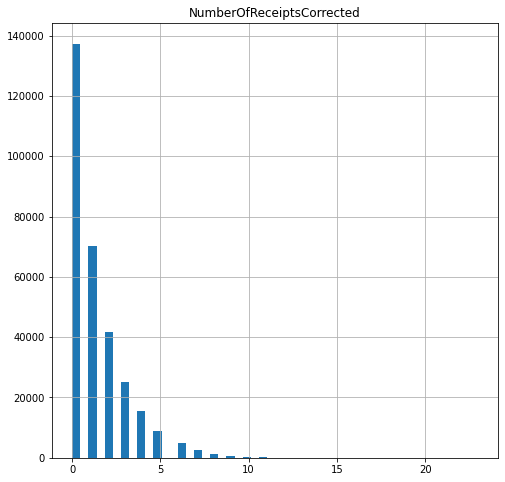

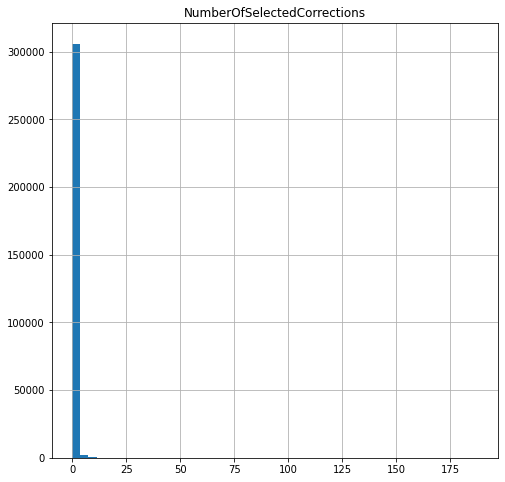

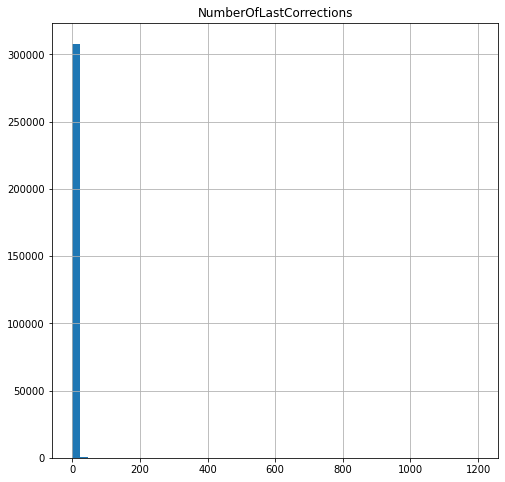

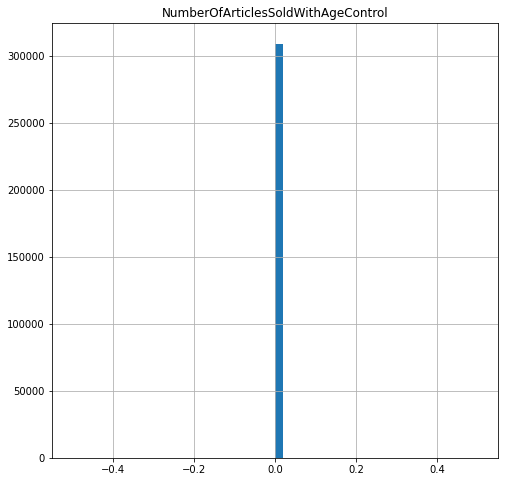

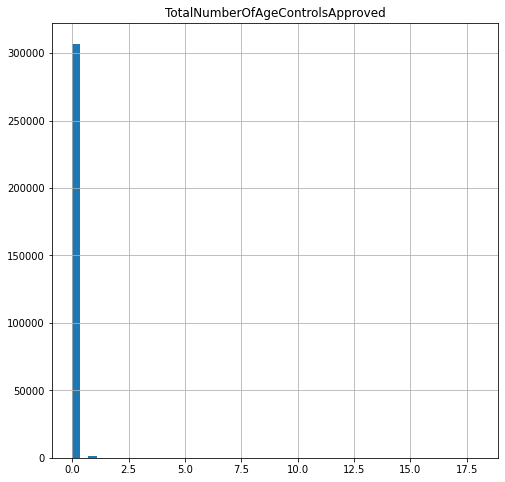

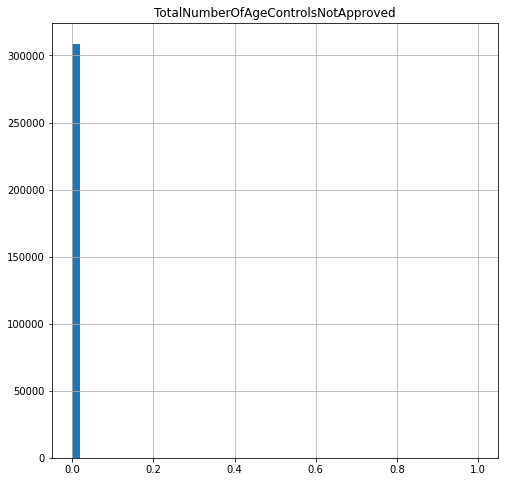

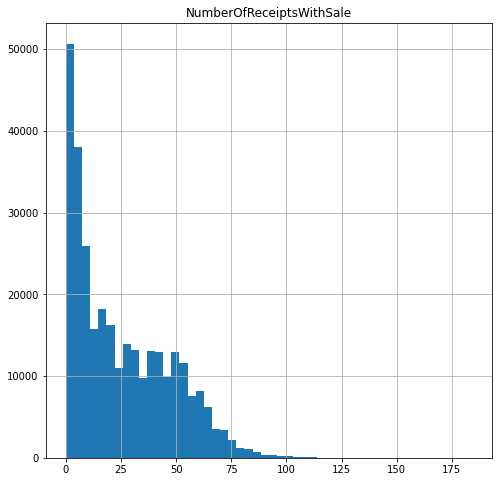

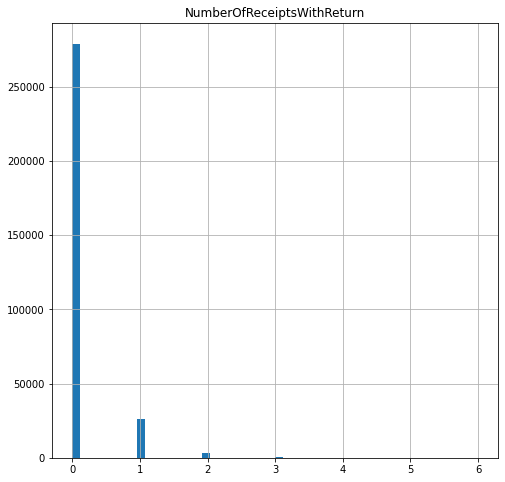

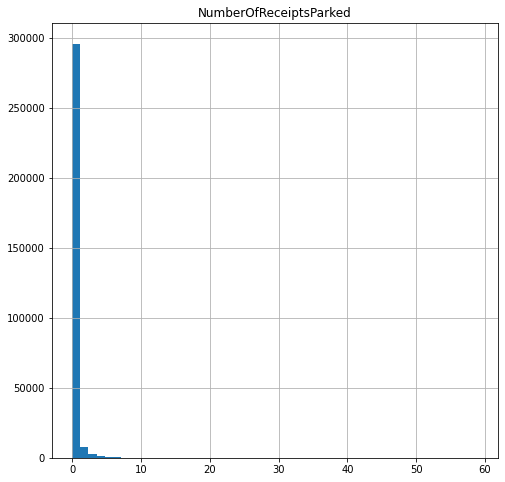

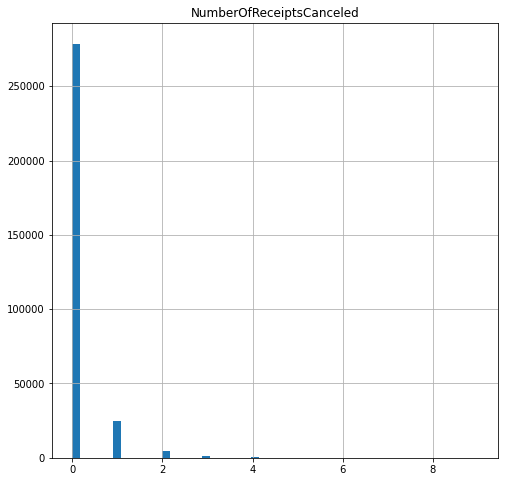

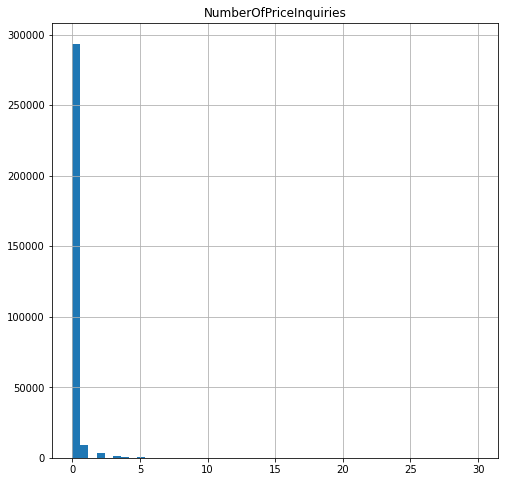

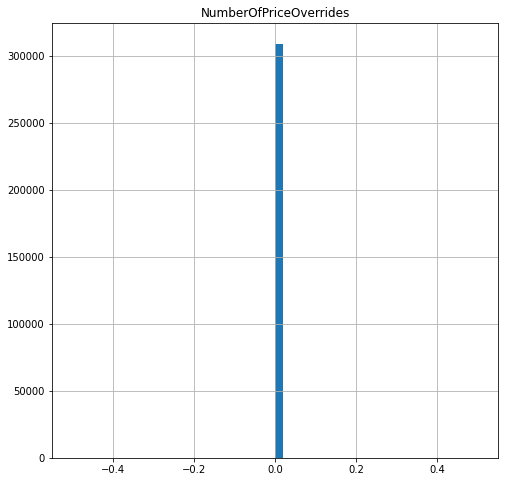

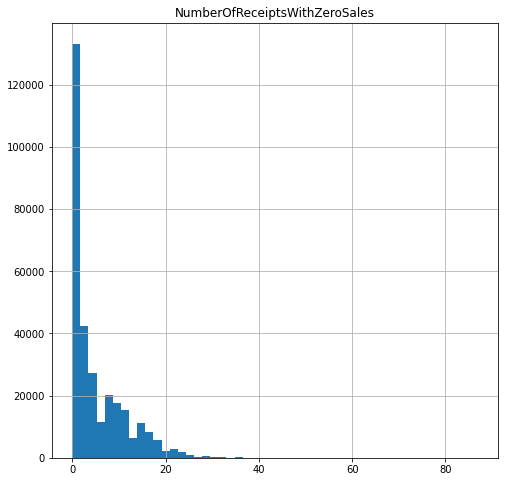

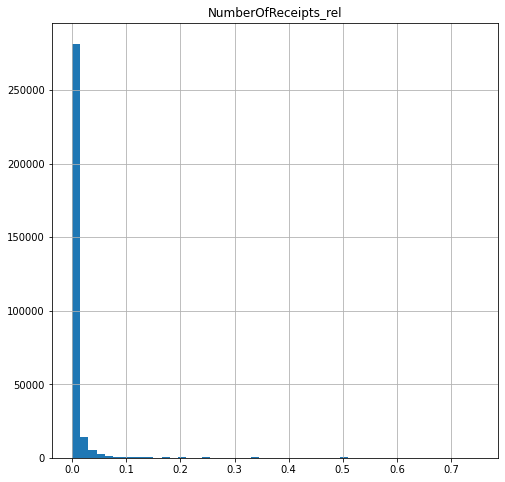

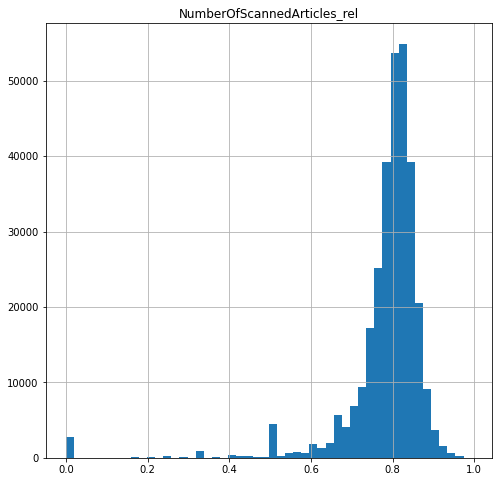

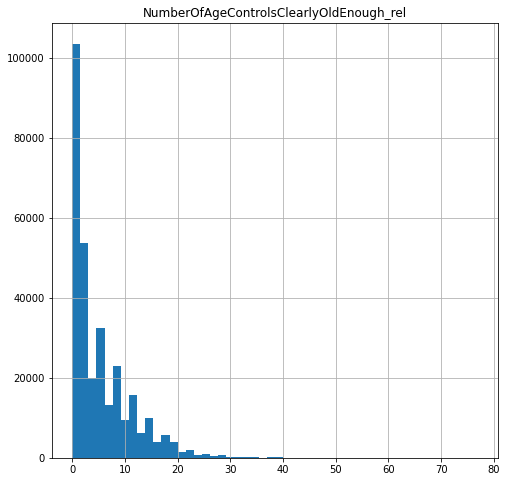

In [14]:
import matplotlib.pyplot as plt
from time import sleep 


for col in list(df_target):
    plt.figure()
    ax = df_target[col].hist(bins = 50, figsize= (8,8))
    ax.set_title(col)


### Drop uninformative columns 

In [0]:
df_target = df_target.drop([
    'NumberOfSelectedCorrections',
    'NumberOfLastCorrections',
    'NumberOfArticlesSoldWithAgeControl',
    'TotalNumberOfAgeControlsApproved',
    'TotalNumberOfAgeControlsNotApproved',
    'NumberOfPriceOverrides',
    ] , axis= 1)


In [16]:
list(df_target)

['NumberOfReceiptsCorrected',
 'NumberOfReceiptsWithSale',
 'NumberOfReceiptsWithReturn',
 'NumberOfReceiptsParked',
 'NumberOfReceiptsCanceled',
 'NumberOfPriceInquiries',
 'NumberOfReceiptsWithZeroSales',
 'NumberOfReceipts_rel',
 'NumberOfScannedArticles_rel',
 'NumberOfAgeControlsClearlyOldEnough_rel']

### Detect individual anomalies by single feature 

Consider record as anomaly if |x- $\mu$|  > 10 * $\sigma$ 

In [17]:
coef = 10  # outlier distance from mean > coef * sigma

for col in list(df_target):
    print (f'\ncol: {col}')
    col_mean, col_std = df_target[col].mean(), df_target[col].std()
    print (f'mean= {col_mean:,.2f} stf = {col_std:,.2f}')
    mask = np.abs(df_target[col]-col_mean)> coef* col_std
    df_outliers = df_target[mask]
    print ('n_outliers = {:,}\n values:\n{}'.format(len(df_outliers), df_outliers[col].value_counts()))

    # for col_group in ['ReceiptDate','ReceiptHour','StoreId','CashierId'] :
    #     print ('n_unique of {}: {:,}'.format(col_group, df_outliers[col_group].nunique()))
    




col: NumberOfReceiptsCorrected
mean= 1.31 stf = 1.72
n_outliers = 3
 values:
19    2
23    1
Name: NumberOfReceiptsCorrected, dtype: int64

col: NumberOfReceiptsWithSale
mean= 25.66 stf = 21.84
n_outliers = 0
 values:
Series([], Name: NumberOfReceiptsWithSale, dtype: int64)

col: NumberOfReceiptsWithReturn
mean= 0.11 stf = 0.36
n_outliers = 82
 values:
4    67
5    13
6     2
Name: NumberOfReceiptsWithReturn, dtype: int64

col: NumberOfReceiptsParked
mean= 0.22 stf = 0.76
n_outliers = 312
 values:
8     91
10    46
9     44
11    24
12    19
13    14
15    14
16    11
14     9
17     7
20     6
18     4
25     3
22     3
21     2
26     2
59     1
51     1
24     1
27     1
28     1
29     1
33     1
34     1
37     1
48     1
49     1
50     1
23     1
Name: NumberOfReceiptsParked, dtype: int64

col: NumberOfReceiptsCanceled
mean= 0.12 stf = 0.42
n_outliers = 114
 values:
5    61
6    37
7     8
8     6
9     2
Name: NumberOfReceiptsCanceled, dtype: int64

col: NumberOfPriceInquiries

## Simple anomaly detection
Compute single probability for all features as product of probability of feature value due to normal distribution estimated for every feature  distribution

In [0]:
from scipy.stats import norm
mu = df_target.mean(axis= 0) # this is vector of mean of every features 
std = df_target.mean(axis= 0) # this is vector of std of every features 
df_target['prob']= df_target.apply (lambda row: np.prod(norm.pdf(row.values, mu, std)) , axis=1)

In [68]:
df_target.sample (10)[['prob']]

,prob
1025793,2.957668e-03
634284,1.550372e-03
1457443,2.774554e-22
171023,2.210208e-03
125803,5.634402e-07
1081868,2.073502e-03
342384,1.785835e-03
1753515,3.486924e-03
1422333,6.524543e-95
1741653,2.235032e-105


### Investigate number of outliers depending of $\epsilon$ 

In [69]:
for eps in 1e-10**(np.arange(1,40,3)):
    print ('eps= {:2}, n_outliers = {}'.format(eps, len(df_anomaly[df_target.prob<eps])))

eps= 1e-10, n_outliers = 76349
eps= 1.0000000000000001e-40, n_outliers = 24204
eps= 1.0000000000000003e-70, n_outliers = 16399
eps= 1.0000000000000004e-100, n_outliers = 12605
eps= 1.0000000000000005e-130, n_outliers = 7508
eps= 1.0000000000000006e-160, n_outliers = 6385
eps= 1.0000000000000006e-190, n_outliers = 5897
eps= 1.0000000000000008e-220, n_outliers = 5321
eps= 1.000000000000001e-250, n_outliers = 3852
eps= 1.000000000000001e-280, n_outliers = 3304
eps= 1e-310, n_outliers = 3177
eps= 0.0, n_outliers = 0
eps= 0.0, n_outliers = 0


### Select most probably anomalies 
Records with the least probability 

In [70]:
eps= 1e-280
anomaly_mask  = df_target.prob<eps
df_anlomaly = df_top_weekday[anomaly_mask]
df_anlomaly.sample(10)

,ReceiptDate,ReceiptHour,StoreId,CashierId,CashRegisterNo,Pos3rdPartySalesAmount,NumberOfScannedArticles,NumberOfScannableArticles,NumberOfReceiptsCorrected,NumberOfSelectedCorrections,SelectedCorrectionsAmount,NumberOfLastCorrections,LastCorrectionsAmount,NumberOfArticlesWithGenericGtinInReturn,NumberOfReceiptsWithGenericGtinInReturn,GenericGtinReturnAmount,TotalNumberOfAgeControlsApproved,TotalNumberOfAgeControlsNotApproved,NumberOfAgeControlsApprovedByFingerprints,NumberOfAgeControlsNotApprovedByFingerprints,NumberOfArticlesSoldWithAgeControl,NumberOfAgeControlsClearlyOldEnough,NumberOfReceiptsWithCustomerWarrantyPayout,NumberOfArticlesWithCustomerWarrantyActive,NumberOfArticlesWithCustomerWarrantyPayout,CustomerWarrantyPayoutAmount,SalesAmount,ReturnAmount,BottleDepositSalesAmount,BottleDepositReturnAmount,BottleDepositManualReturnAmount,NumberOfReceiptsWithBottleDepositManualReturn,NumberOfReceipts,NumberOfReceiptsWithSale,NumberOfReceiptsWithReturn,NumberOfReceiptsWith3rdPartySales,NumberOfReceiptsWithOnly3rdPartySales,NumberOfReceiptsWithout3rdPartySales,NumberOfReceiptsParked,NumberOfReceiptsCanceled,Pos3rdPartyReturnAmount,NumberOf3rdPartyScannedArticles,NumberOf3rdPartyScannableArticles,PriceOverrideDiscountAmount,ParkedReceiptSumTotalAmount,NumberOfDrawerOpenings,NumberOfPriceInquiries,NumberOfPriceOverrides,NumberOfReceiptsWithZeroSales,QuantityOfArticlesWithGenericGtinInReturn,QuantityOfArticlesSoldWithAgeControl,QuantityOfArticlesWithCustomerWarrantyActive,QuantityOfArticlesWithCustomerWarrantyPayout,CanceledReceiptsAmount,date,day_name
1724336,20150323,14,74565,8133,1,0.0,689,809,3,0,0.0,3,81.80,1,1,-10.0,0,0,0,0,0,16,21,0,1465,0.0,25633.54,-10.0,226.0,-27.0,-285.0,5,51,50,1,0,0,50,0,0,0.0,0,0,0.0,0.0,0,5,0,0,1,0,0,1465,0.0,2015-03-23,Monday
1619596,20150330,11,74888,5510,4,0.0,61,64,1,0,0.0,1,49.90,0,0,0.0,0,0,0,0,0,2,1,0,68,0.0,2880.98,-49.9,23.0,0.0,0.0,0,4,4,1,0,0,4,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,68,0.0,2015-03-30,Monday
1628977,20150316,14,74622,1106,1,0.0,591,729,1,0,0.0,1,57.88,0,0,0.0,0,0,0,0,0,15,16,0,986,0.0,21737.80,0.0,324.0,-728.0,0.0,0,51,51,0,0,0,51,0,2,0.0,0,0,0.0,0.0,0,4,0,1,0,0,0,986,161.6,2015-03-16,Monday
288243,20150209,21,73526,10377,1,0.0,62,72,0,0,0.0,0,0.00,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,2053.94,-160.2,0.0,0.0,0.0,0,4,4,1,0,0,4,0,0,0.0,0,0,0.0,0.0,0,0,0,1,0,0,0,0,0.0,2015-02-09,Monday
1341588,20150302,18,74169,8685,3,0.0,33,38,0,0,0.0,0,0.00,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,825.94,-51.9,6.0,0.0,0.0,0,5,3,2,0,0,3,0,0,0.0,0,0,0.0,0.0,0,0,0,2,0,0,0,0,0.0,2015-03-02,Monday
1489646,20150323,18,74882,6175,3,0.0,0,2,0,0,0.0,0,0.00,0,0,0.0,0,0,0,0,0,0,1,0,69,0.0,500.00,0.0,0.0,0.0,0.0,0,1,1,0,0,0,1,0,0,0.0,0,0,0.0,0.0,0,7,0,1,0,0,0,69,0.0,2015-03-23,Monday
1632911,20150316,16,74887,10109,2,0.0,544,697,4,0,0.0,4,96.40,0,0,0.0,0,0,0,0,0,14,28,0,1731,0.0,19576.20,0.0,318.0,-438.0,0.0,0,68,68,0,0,0,68,0,0,0.0,0,0,0.0,0.0,1,4,0,0,0,0,0,1731,0.0,2015-03-16,Monday
1475882,20150112,17,73647,1889,3,0.0,87,104,0,0,0.0,0,0.00,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,2633.91,-63.3,17.0,0.0,0.0,0,7,5,2,0,0,5,0,0,0.0,0,0,0.0,0.0,0,0,0,1,0,0,0,0,0.0,2015-01-12,Monday
1656577,20150316,16,74761,8866,2,0.0,601,723,2,0,0.0,4,199.30,0,0,0.0,0,0,0,0,0,14,26,0,1599,0.0,19360.59,0.0,389.0,-204.5,0.0,0,55,55,0,0,0,55,0,0,0.0,0,0,0.0,0.0,8,7,0,1,0,0,0,1599,0.0,2015-03-16,Monday
1341547,20150223,23,74366,12030,1,0.0,2,2,0,0,0.0,0,0.00,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.00,-158.0,0.0,0.0,0.0,0,2,0,2,0,0,0,0,0,0.0,0,0,0.0,0.0,2,0,0,0,0,0,0,0,0.0,2015-02-23,Monday


### Investigate pattern by CashierId

In [33]:
df_anlomaly.CashierId.value_counts().head(10)

6640     15
309      12
308      11
10441    10
8165      9
12399     9
1260      9
2613      8
2718      8
7411      8
Name: CashierId, dtype: int64

### Investigate pattern by StoreId

In [35]:
df_anlomaly.StoreId.value_counts().head(10)

74696    31
74705    28
73661    22
74968    22
74943    19
74698    16
74683    15
73956    14
74536    14
74969    14
Name: StoreId, dtype: int64

## Visualize outliers 
### Normalize data 

In [50]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
if 'prob' in df_target:
    del df_target['prob']

X = scaler.fit_transform(df_target.values)
print (X.shape)
X[:5]

(308857, 10)


array([[0.        , 0.00543478, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.50308642, 0.        ],
       [0.        , 0.00543478, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.50308642, 0.        ],
       [0.        , 0.00543478, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.50308642, 0.        ],
       [0.        , 0.00543478, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.50308642, 0.        ],
       [0.        , 0.00543478, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.50308642, 0.        ]])

### Reduce dimensionality 

In [43]:
from sklearn.decomposition import PCA

def compress_score(X, X_approximate):
    return np.sum(np.apply_along_axis (np.linalg.norm,1, (X-X_approximate))**2)/\
        np.sum(np.apply_along_axis (np.linalg.norm,1, X)**2)

pca = PCA(n_components=2)

Z_pca = pca.fit_transform(X)
X_approximate = pca.inverse_transform(Z_pca)
print ('compress_score = {} [expected to be less than 0.05]'.format(compress_score(X, X_approximate)))

compress_score = 0.020390261126077544 [expected to be less than 0.05]


In [71]:
predicted = anomaly_mask.apply(int)
set (predicted), predicted.mean()

# visualize_clusters(Z_pca,(predicted+1)//2)

({0, 1}, 0.010697507260641656)

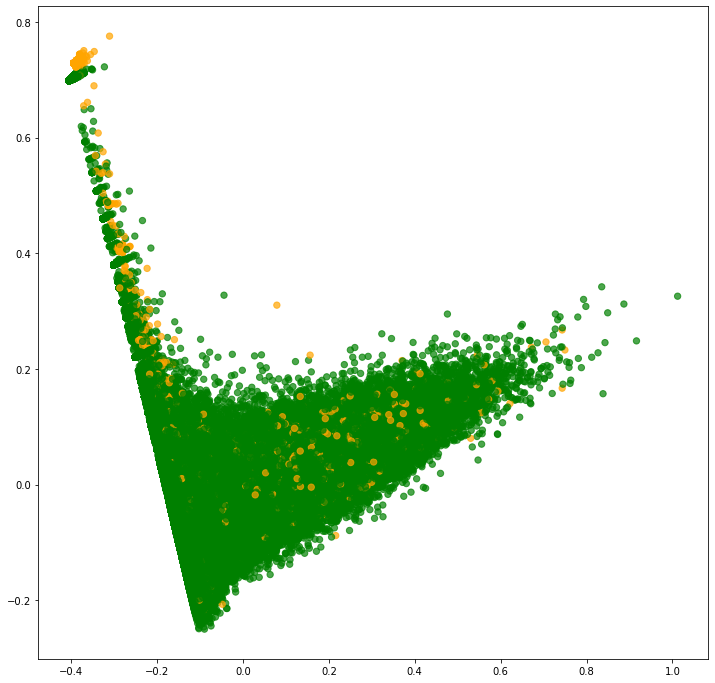

In [62]:
def visualize_clusters(Z_pca, predicted):
    plt.figure(figsize=(12,12))
    colors=  np.array(['green', 'orange','grey', 'brown', 'blue', 'yellow'])
    colors= np.r_[colors, np.array(['black']*100)]
    plt.scatter(Z_pca[:,0], Z_pca[:,1], s= 40, c= colors[predicted], label='negative', alpha = 0.7)
    plt.show()
    
visualize_clusters(Z_pca,predicted)

## Apply sklearn alforithms

In [0]:
from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


outliers_fraction = 0.001

anomaly_algorithms = [
    EllipticEnvelope(contamination=outliers_fraction),
    svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1),
    IsolationForest(contamination=outliers_fraction,random_state=42),
    LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction)]


### Gausian estimation

In [0]:
algorithm = anomaly_algorithms [0]
predicted = algorithm.fit(X).predict(X)
set(predicted)

{-1, 1}

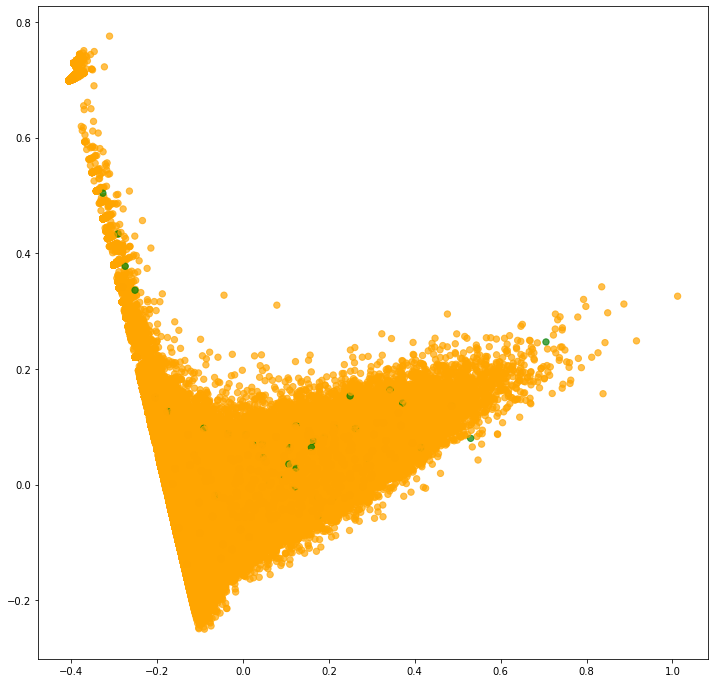

In [0]:
visualize_clusters(Z_pca,(predicted+1)//2)

In [0]:
algorithm = anomaly_algorithms [1]
predicted = algorithm.fit(X).predict(X)
set(predicted)

{-1, 1}

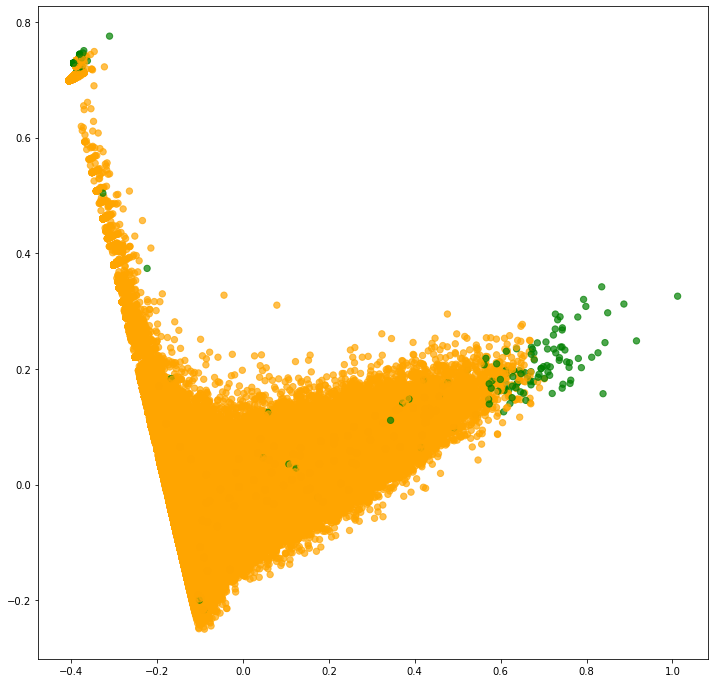

In [0]:
visualize_clusters(Z_pca,(predicted+1)//2)

In [0]:
algorithm = anomaly_algorithms [2]
predicted = algorithm.fit(X).predict(X)
set(predicted), ((predicted+1)/2).mean()

({-1, 1}, 0.998999537002561)

In [0]:
((predicted+1)/2).mean()

0.998999537002561

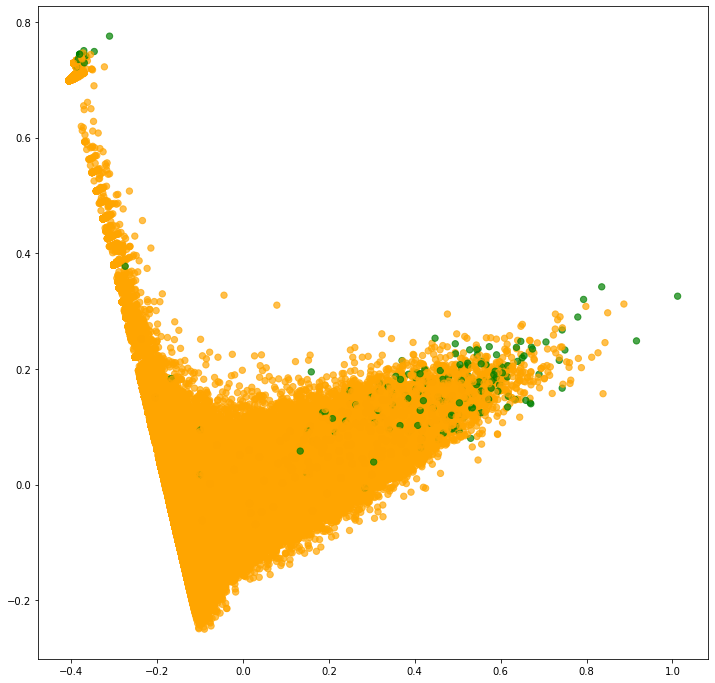

In [0]:
visualize_clusters(Z_pca,(predicted+1)//2)

In [0]:
algorithm = anomaly_algorithms [3]
predicted = algorithm.fit_predict(X)
set(predicted)

{-1, 1}

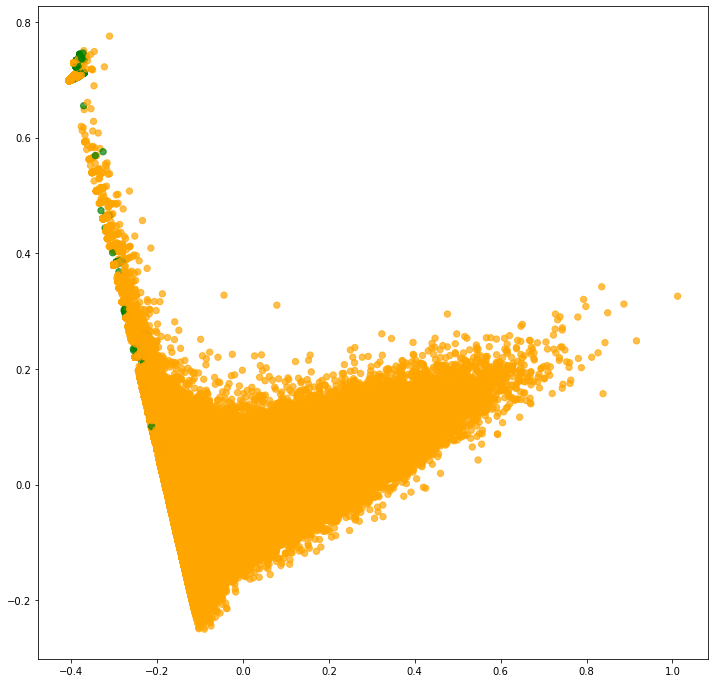

In [0]:
visualize_clusters(Z_pca,(predicted+1)//2)

## Clustering 

May allows to detect clusters of  similar records 
### K-means

In [0]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=8)  
predicted = clf.fit_predict(X)

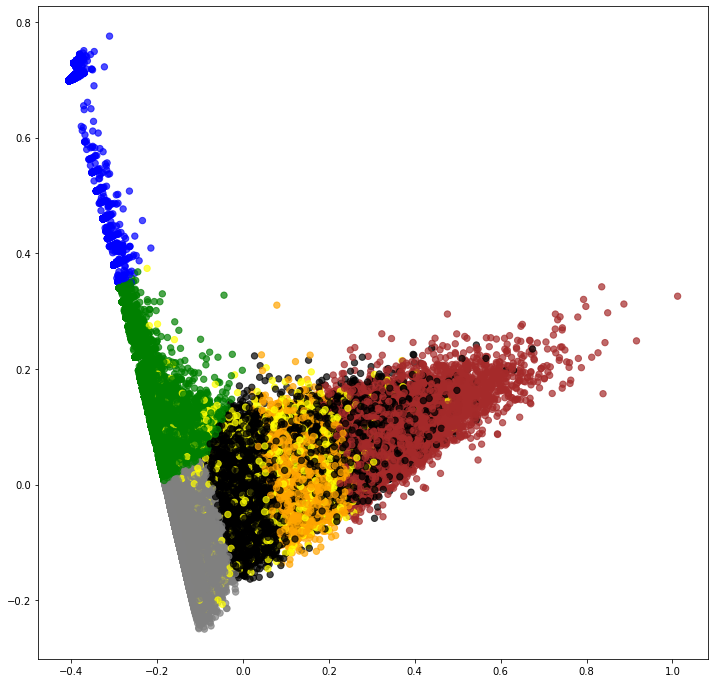

In [0]:
visualize_clusters(Z_pca,predicted)

### Agglomerative Clustering

In [0]:
from sklearn.cluster import AgglomerativeClustering
clf = AgglomerativeClustering(n_clusters=8, linkage= 'ward')  
predicted = clf.fit_predict(X)

In [0]:
visualize_clusters(Z_pca,predicted)

## Use t-SNE for visualization 

In [72]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
Z_tsne = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 308857 samples in 77.720s...
[t-SNE] Computed neighbors for 308857 samples in 176.554s...
[t-SNE] Computed conditional probabilities for sample 1000 / 308857
[t-SNE] Computed conditional probabilities for sample 2000 / 308857
[t-SNE] Computed conditional probabilities for sample 3000 / 308857
[t-SNE] Computed conditional probabilities for sample 4000 / 308857
[t-SNE] Computed conditional probabilities for sample 5000 / 308857
[t-SNE] Computed conditional probabilities for sample 6000 / 308857
[t-SNE] Computed conditional probabilities for sample 7000 / 308857
[t-SNE] Computed conditional probabilities for sample 8000 / 308857
[t-SNE] Computed conditional probabilities for sample 9000 / 308857
[t-SNE] Computed conditional probabilities for sample 10000 / 308857
[t-SNE] Computed conditional probabilities for sample 11000 / 308857
[t-SNE] Computed conditional probabilities for sample 12000 / 308857
[t-SNE] Computed conditional pro